# IIA 2024 - Aprendizaje Automatizado

## Trabajo Practico 1

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Ejercicio 1

In [141]:
def inside_circle(x,y):
  return np.linalg.norm([x,y]) <= 1

def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def in_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def in_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    for i in [1, 3, 5, 7]:
        if in_curve(rho, theta, i):
            return True
    return False

def espirales(n):
  half = int(n/2)
  bothClass = []
  countClass0 = 0
  countClass1 = 0
  
  while (countClass0 < half or countClass1 < n-half):
    gen = np.random.uniform(-1,1,size=(half,2))
    for (x,y) in gen:
      if (inside_circle(x,y)):
        if (in_curves(x,y)):
          if (countClass0 < half):
            bothClass.append([x,y,0])
            countClass0 += 1
        else:
          if (countClass1 < n - half):
            bothClass.append([x,y,1])
            countClass1 += 1
  df = pd.DataFrame(bothClass, columns=['dim_0', 'dim_1', 'class'])
  return df

Accuracy 150 Datos: 0.6753
Accuracy 600 Datos: 0.848
Accuracy 3000 Datos: 0.9105


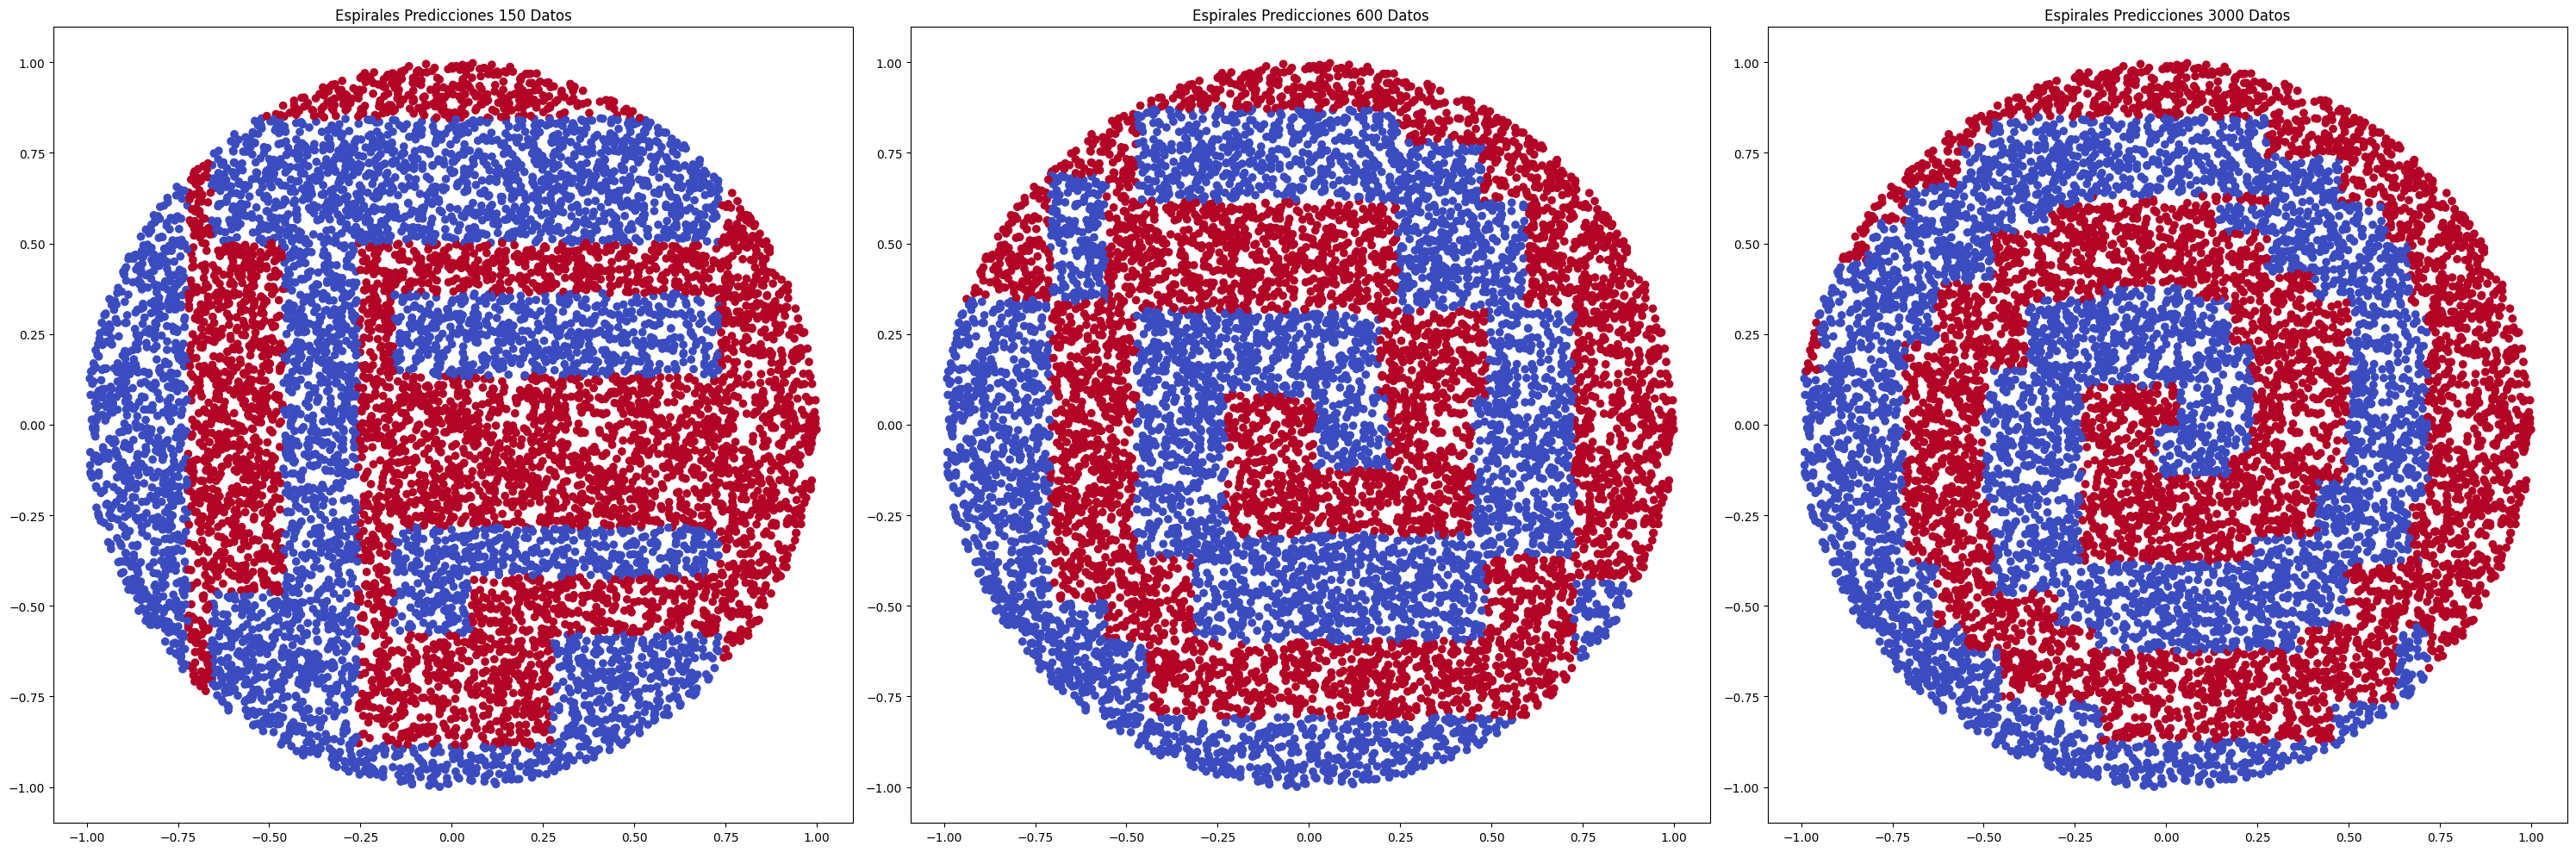

In [142]:
testEspiral10000 = espirales(10000)
X_test = testEspiral10000.drop(columns=['class'])
y_test = testEspiral10000['class']
sizes = [150, 600, 3000]

fig, axs = plt.subplots(1, 3, figsize=(30, 10))

for idx, samples in enumerate(sizes):
    df = espirales(samples)
    X = df.drop(columns=['class'])
    y = df['class']
    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf = clf.fit(X, y)
    ax = axs[idx]
    ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clf.predict(X_test), cmap='coolwarm')
    ax.set_title(f'Espirales Predicciones {samples} Datos')
    print(f'Accuracy {samples} Datos: {clf.score(X_test, y_test)}')

plt.tight_layout() 
plt.show()


Se puede observar que, a medida que entrenamos el árbol de decisión con más muestras, la figura resultante se asemeja más a una espiral. Esto se evidencia en la precisión de las predicciones de cada árbol en el conjunto de prueba.<br>

Mientras menor la cantidad de ejemplos para el entrenamiento, el gráfico de las predicciones tiende a ser más "cuadrado" o "poligonal" en comparación con el gráfico generado utilizando 10000 muestras. Con menos datos, el árbol tiene menos información para dividir el espacio, lo que resulta en particiones más grandes y menos precisas. Esto genera formas más aproximadas y menos detalladas. Estas divisiones son menos representativas de la distribución real de los datos.<br>

## Ejercicio 2

In [143]:
sizes = [125, 250, 500, 1000, 2000, 4000]
dataDiagonales = []
dataParalelas = []

### Diagonales

In [144]:
def diagonales(n, d, C):
  half = int(n/2)

  mClass0 = -np.ones(d)
  mClass1 = np.ones(d)
  covM = np.identity(d) * (C**2 * d)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

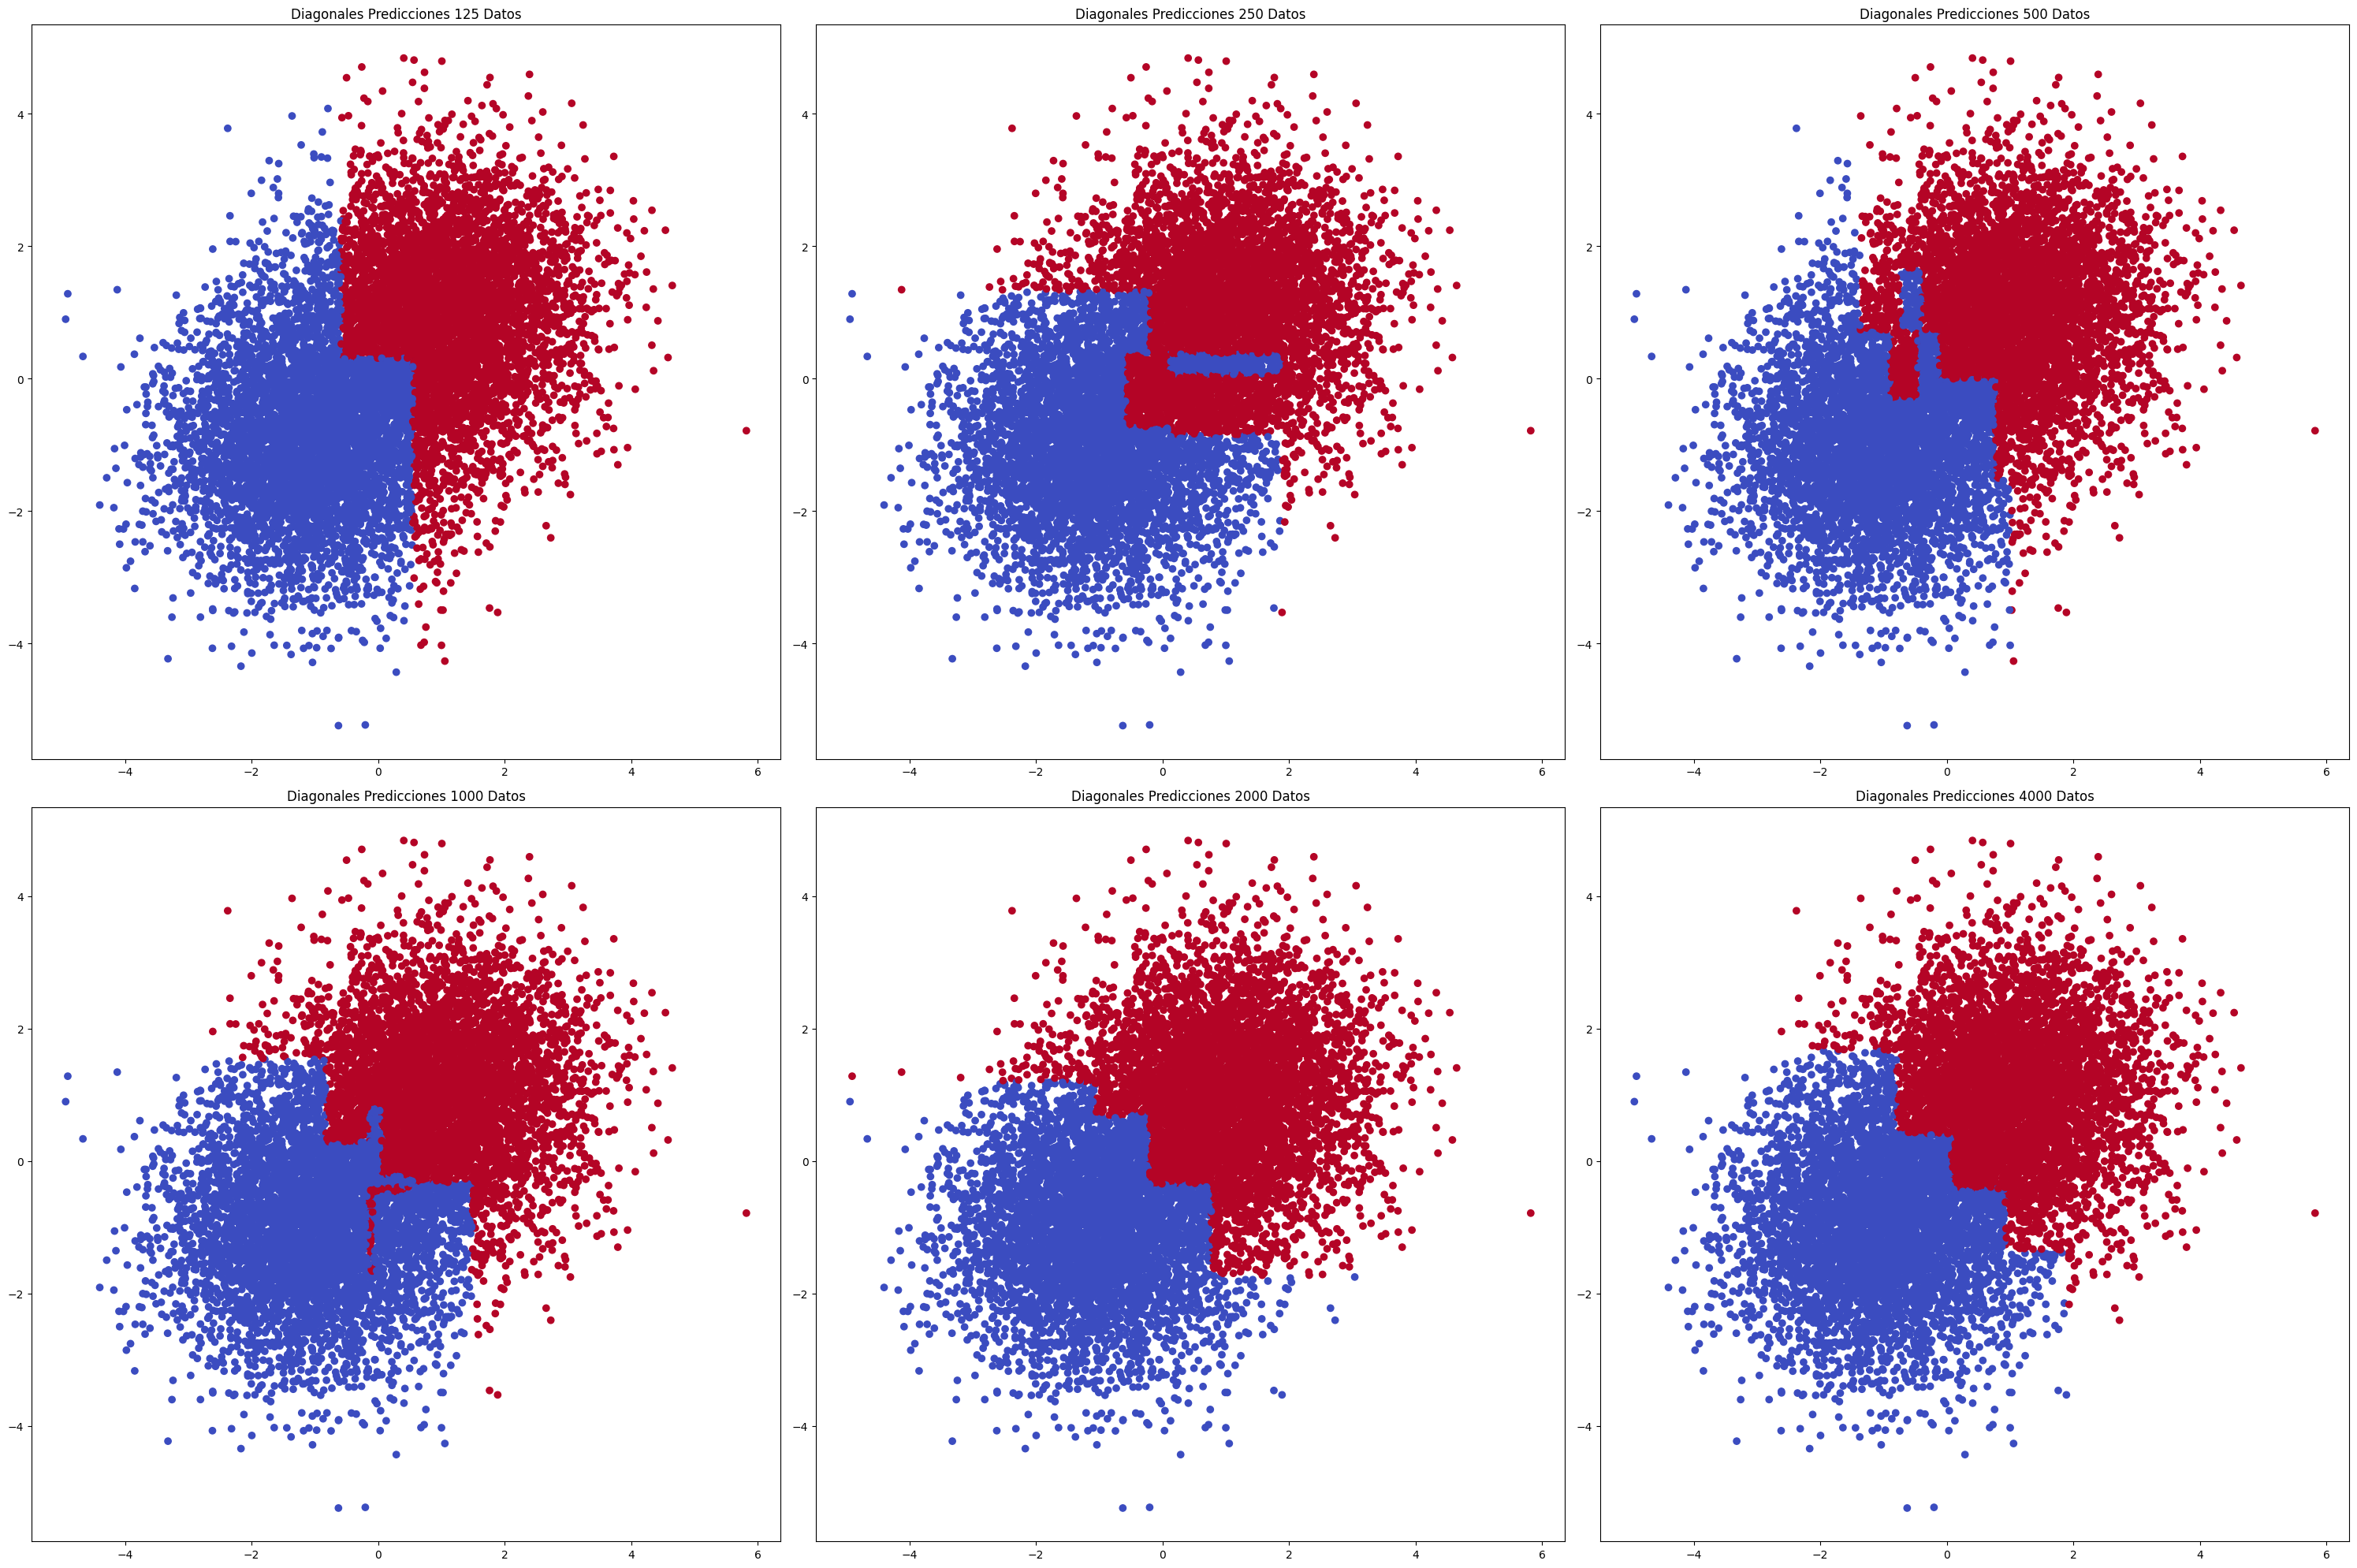

In [145]:
testDiagonales10000 = diagonales(10000, 2, 0.78)
X_test = testDiagonales10000.drop(columns=['class'])
y_test = testDiagonales10000['class']

fig, axs = plt.subplots(2, 3, figsize=(30, 20))
for idx, samples in enumerate(sizes):
    for conjunto in range(0, 20):
        dfDiagonales = diagonales(samples, 2, 0.78)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errEntrenamiento = 1 - clf.score(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataDiagonales.append([samples, conjunto, errEntrenamiento, errTest, treeSize])
        if conjunto == 0: 
            ax = axs[idx // 3, idx % 3]  
            ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clf.predict(X_test), cmap='coolwarm')
            ax.set_title(f'Diagonales Predicciones {samples} Datos')

plt.tight_layout() 
plt.show()

### Paralelas

In [146]:
def paralelas(n, d, C):
  half = int(n/2)

  mClass0 = np.zeros(d)
  mClass0[0] = 1
  mClass1 = np.zeros(d)
  mClass1[0] = -1
  covM = np.identity(d) * (C**2)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

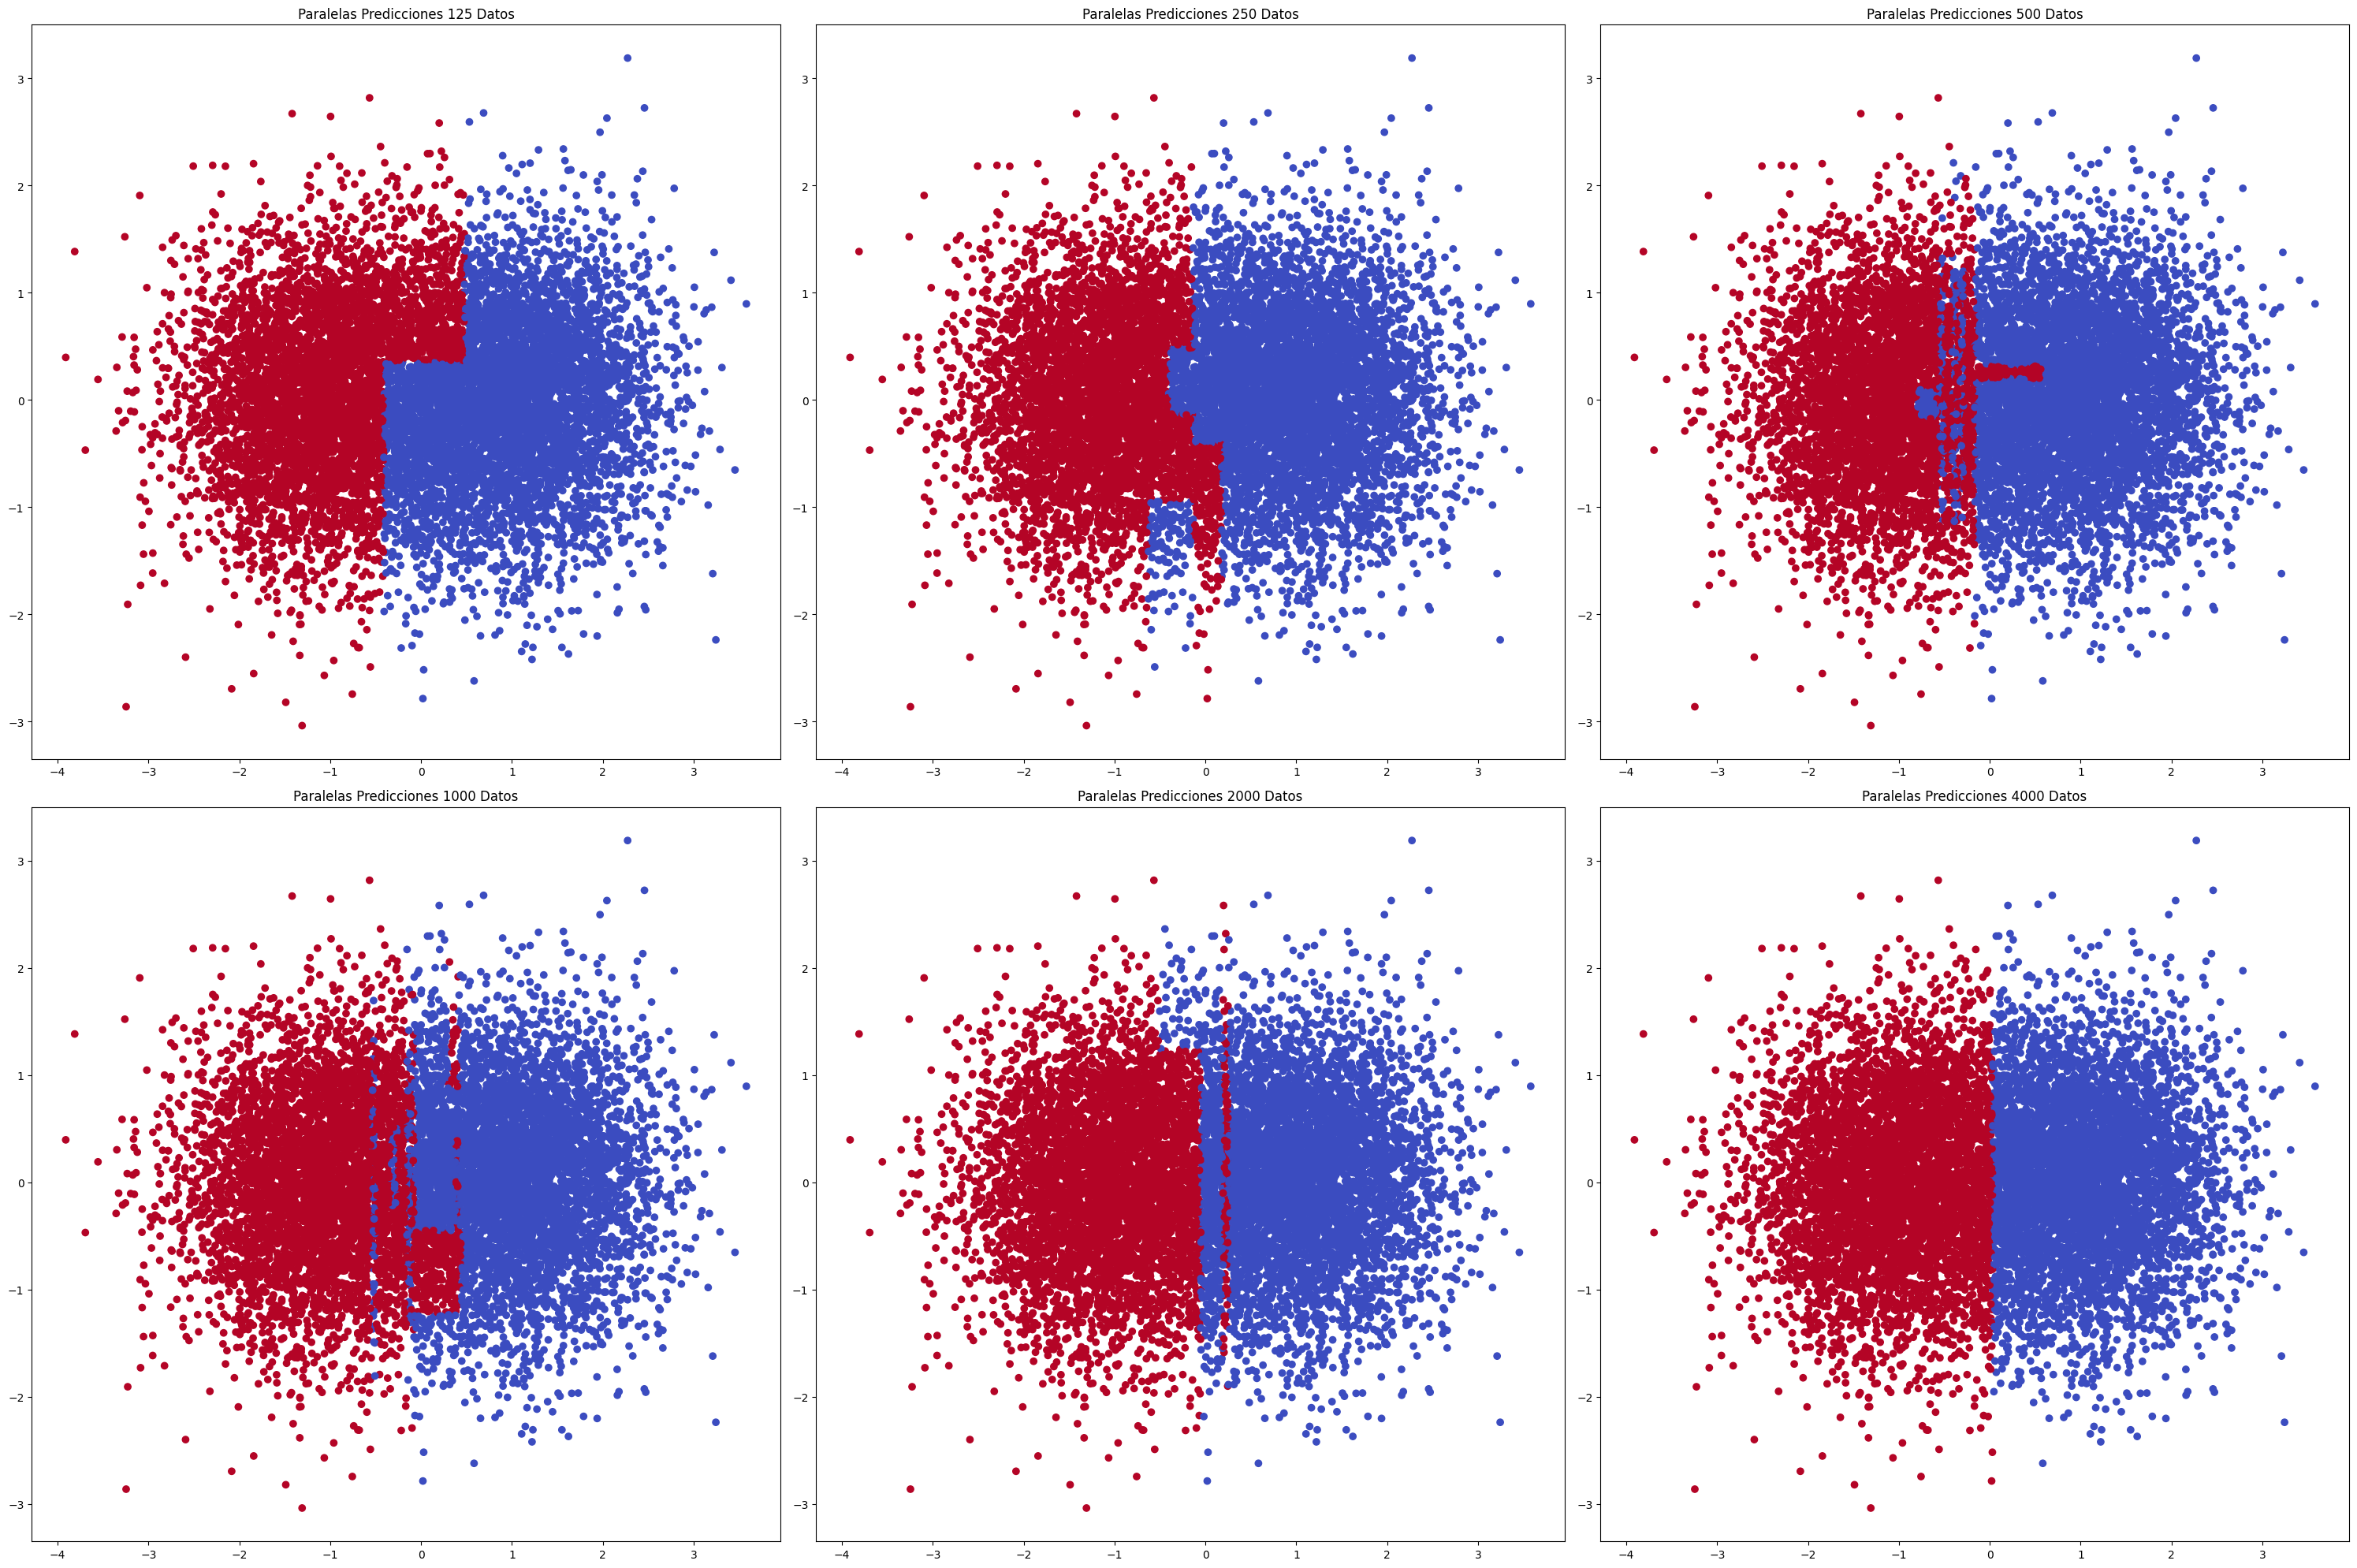

In [147]:
testParalelas10000 = paralelas(10000, 2, 0.78)
X_test = testParalelas10000.drop(columns=['class'])
y_test = testParalelas10000['class']

fig, axs = plt.subplots(2, 3, figsize=(30, 20))
for idx, samples in enumerate(sizes):
    for conjunto in range(0, 20):
        dfParalelas = paralelas(samples, 2, 0.78)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errEntrenamiento = 1 - clf.score(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataParalelas.append([samples, conjunto, errEntrenamiento, errTest, treeSize])
        if conjunto == 0: 
            ax = axs[idx // 3, idx % 3]  
            ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clf.predict(X_test), cmap='coolwarm')
            ax.set_title(f'Paralelas Predicciones {samples} Datos')

plt.tight_layout() 
plt.show()

### Errores

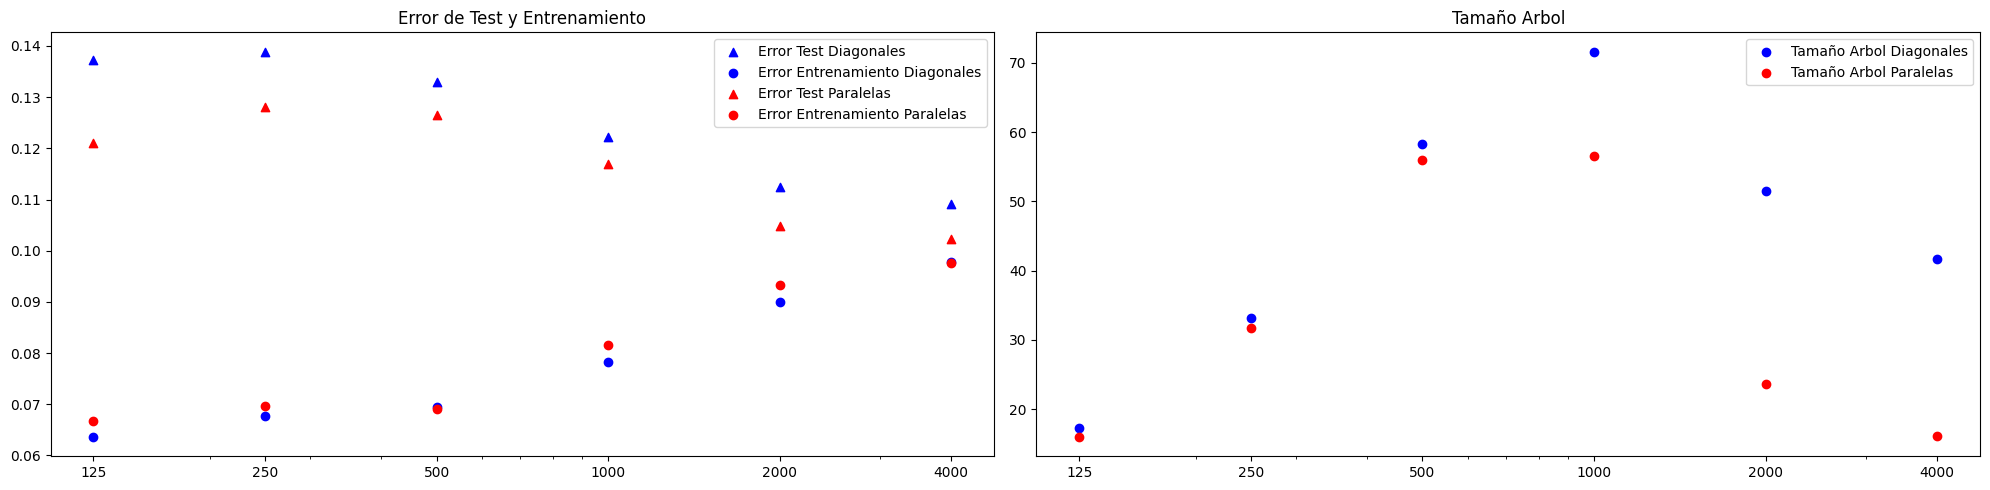

In [148]:
dfDiagonales = pd.DataFrame(dataDiagonales, columns=['samples', 'conjunto', 'errEntrenamiento', 'errTest', 'treeSize'])
dfParalelas = pd.DataFrame(dataParalelas, columns=['samples', 'conjunto', 'errEntrenamiento', 'errTest', 'treeSize'])
promsErrTestDiagonales = dfDiagonales.groupby('samples')['errTest'].mean()
promsErrEntrenamientoDiagonal = dfDiagonales.groupby('samples')['errEntrenamiento'].mean()
promsErrTestParalelas = dfParalelas.groupby('samples')['errTest'].mean()
promsErrEntrenamientoParalelas = dfParalelas.groupby('samples')['errEntrenamiento'].mean()
treeSizeDiagonal = dfDiagonales.groupby('samples')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('samples')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(sizes, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='^')
axs[0].scatter(sizes, promsErrEntrenamientoDiagonal, c='blue', label='Error Entrenamiento Diagonales', marker='o')
axs[0].scatter(sizes, promsErrTestParalelas, c='red', label='Error Test Paralelas', marker='^')
axs[0].scatter(sizes, promsErrEntrenamientoParalelas, c='red', label='Error Entrenamiento Paralelas', marker='o')
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_title('Error de Test y Entrenamiento')
axs[0].set_xticks(sizes, labels=[str(size) for size in sizes])

axs[1].scatter(sizes, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].scatter(sizes, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(sizes, labels=[str(size) for size in sizes])

plt.tight_layout() 
plt.show()

Podemos observar en los gráficos de predicciones para ambos casos, diagonales y paralelas, que a medida que aumentan las muestras de entrenamiento, las predicciones se asemejan más a la figura "ideal". A medida que se incrementan las muestras de entrenamiento hasta 1000, las formas de los sectores con objetos mal clasificados se vuelven más complejas y diversas. Al principio, estos sectores son grandes y homogéneos, pero a medida que se agregan más muestras, se fragmentan en múltiples formas más finas y pequeñas.<br>

Al superar las 1000 muestras de entrenamiento, observamos una normalización en esta situación. Con 2000 y 4000 muestras, el árbol de decisión parece encontrar una regla de clasificación más general y correcta, lo que resulta en una representación más precisa de la forma ideal. Esto se evidencia en el tamaño del árbol, que aumenta hasta los 1000 ejemplos y luego disminuye considerablemente. Además, en los gráficos, la separación entre las clases es más clara y hay menos sectores mal clasificados.<br>

El error de entrenamiento aumenta a medida que se utilizan más muestras de entrenamiento porque es más difícil ajustar el modelo a todas las variaciones presentes en los datos. Esto conduce a una regla de clasificación más general. Sin embargo, esta generalización hace que el error en el conjunto de prueba disminuya, ya que el modelo puede capturar mejor la estructura subyacente de los datos y hacer predicciones más precisas en muestras no vistas.<br>

## Ejercicio 3

In [149]:
overlapping = [0.5, 1, 1.5, 2, 2.5]
dataDiagonales = []
dataParalelas = []
dimension = 5
testSamples = 10000
mClass0Diagonales = -np.ones(dimension)
mClass1Diagonales = np.ones(dimension)  
mClass0Paralelas = np.zeros(dimension)
mClass0Paralelas[0] = 1
mClass1Paralelas = np.zeros(dimension)
mClass1Paralelas[0] = -1
ErrIdealTestDiagonales = []
ErrIdealTestParalelas = []

In [150]:
def clasificadorIdeal(X, mClass0, mClass1):
    predictClass = []
    for sample in X:
        predictClass.append(0) if (np.linalg.norm(sample - mClass0) < np.linalg.norm(sample - mClass1)) else predictClass.append(1)
    return predictClass    

### Diagonales

In [151]:
for overlap in overlapping:
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    countOk = 0
    predictClass = clasificadorIdeal(X_test.values, mClass0Diagonales, mClass1Diagonales)
    for cls in range(0,testSamples):
        if predictClass[cls] == y_test[cls]:
            countOk += 1
    ErrIdealTestDiagonales.append(1 - countOk / testSamples)

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataDiagonales.append([overlap, conjunto, errTest, treeSize])



### Paralelas

In [152]:
for overlap in overlapping:
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    countOk = 0
    predictClass = clasificadorIdeal(X_test.values, mClass0Paralelas, mClass1Paralelas)
    for cls in range(0,testSamples):
        if predictClass[cls] == y_test[cls]:
            countOk += 1
    ErrIdealTestParalelas.append(1 - countOk / testSamples)

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataParalelas.append([overlap, conjunto, errTest, treeSize])


### Errores

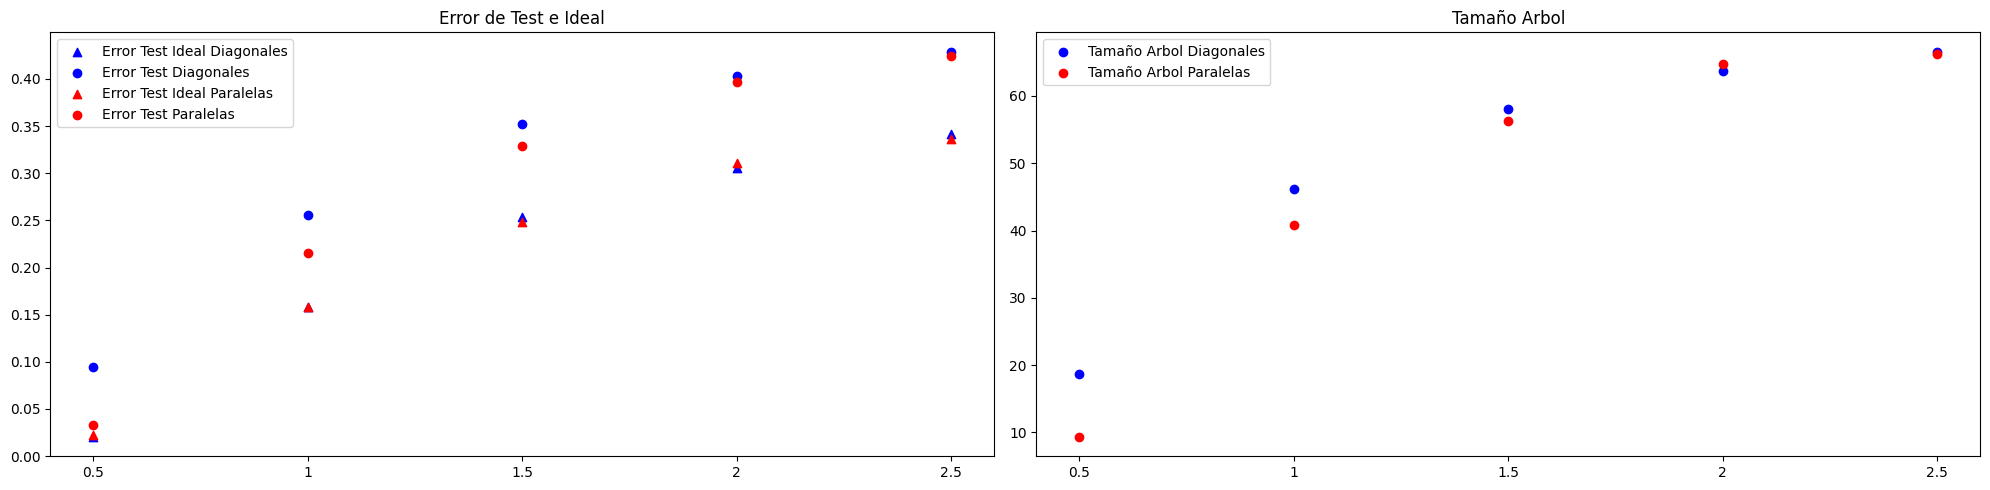

In [153]:
dfDiagonales = pd.DataFrame(dataDiagonales, columns=['overlap', 'conjunto', 'errTest', "treeSize"])
dfParalelas = pd.DataFrame(dataParalelas, columns=['overlap', 'conjunto', 'errTest', "treeSize"])
promsErrTestDiagonales = dfDiagonales.groupby('overlap')['errTest'].mean()
promsErrTestParalelas = dfParalelas.groupby('overlap')['errTest'].mean()

treeSizeDiagonal = dfDiagonales.groupby('overlap')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('overlap')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(overlapping, ErrIdealTestDiagonales, c='blue', label='Error Test Ideal Diagonales', marker='^')
axs[0].scatter(overlapping, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='o')
axs[0].scatter(overlapping, ErrIdealTestParalelas, c='red', label='Error Test Ideal Paralelas', marker='^')
axs[0].scatter(overlapping, promsErrTestParalelas, c='red', label='Error Test Paralelas', marker='o')
axs[0].legend()
axs[0].set_title('Error de Test e Ideal')
axs[0].set_xticks(overlapping, labels=[str(overlap) for overlap in overlapping])

axs[1].scatter(overlapping, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].scatter(overlapping, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(overlapping, labels=[str(overlap) for overlap in overlapping])

plt.tight_layout() 
plt.show()

Mientras mas ruido agregamos mas riesgo de overfitting, y podemos observar como el tamaño del arbol crece a mayor overlapping, ya que genera reglas mas y mas precisas para intentar acomodar a todos los nodos

## Ejercicio 4

In [154]:
dimensiones = [2, 4, 8, 16, 32]
dataDiagonales = []
dataParalelas = []
overlap = 0.78
testSamples = 10000

### Diagonales

In [155]:
for dimension in dimensiones:
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataDiagonales.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

### Paralelas

In [156]:
for dimension in dimensiones:
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataParalelas.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

### Errores

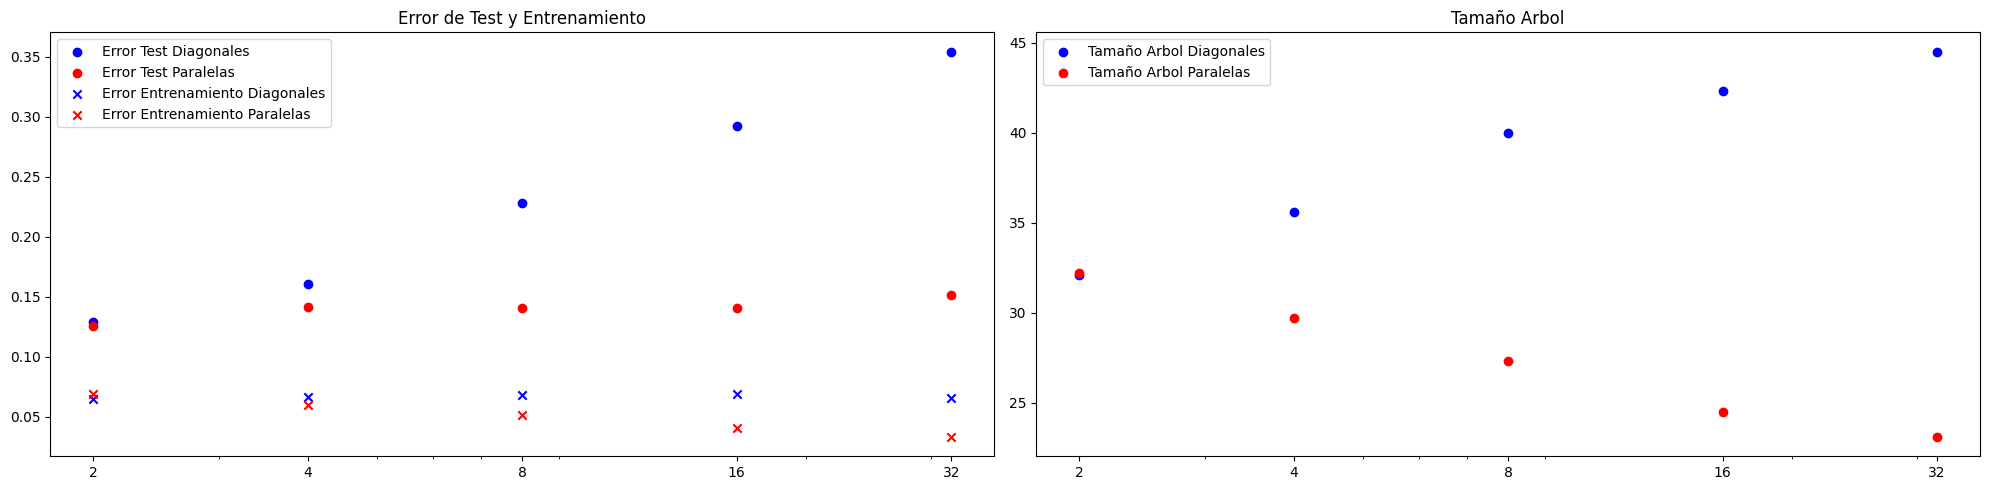

In [157]:
dfDiagonales = pd.DataFrame(dataDiagonales, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
dfParalelas = pd.DataFrame(dataParalelas, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
promsErrTestDiagonales = dfDiagonales.groupby('dimension')['errTest'].mean()
promsErrTestParalelas = dfParalelas.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonales = dfDiagonales.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelas = dfParalelas.groupby('dimension')['errEntrenamiento'].mean()

treeSizeDiagonal = dfDiagonales.groupby('dimension')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('dimension')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(dimensiones, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='o')
axs[0].scatter(dimensiones, promsErrTestParalelas, c='red', label='Error Test Paralelas', marker='o')
axs[0].scatter(dimensiones, promsErrEntrenamientoDiagonales, c='blue', label='Error Entrenamiento Diagonales', marker='x')
axs[0].scatter(dimensiones, promsErrEntrenamientoParalelas, c='red', label='Error Entrenamiento Paralelas', marker='x')
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_title('Error de Test y Entrenamiento')
axs[0].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

axs[1].scatter(dimensiones, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].scatter(dimensiones, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

plt.tight_layout() 
plt.show()

Mientras mas dimensiones es mas dificil saber cual es el atributo que mejor califica y genera las decisiones.

## Ejercicio 5

0.54


C:\Users\Poma\AppData\Local\Temp\ipykernel_7212\1349534121.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


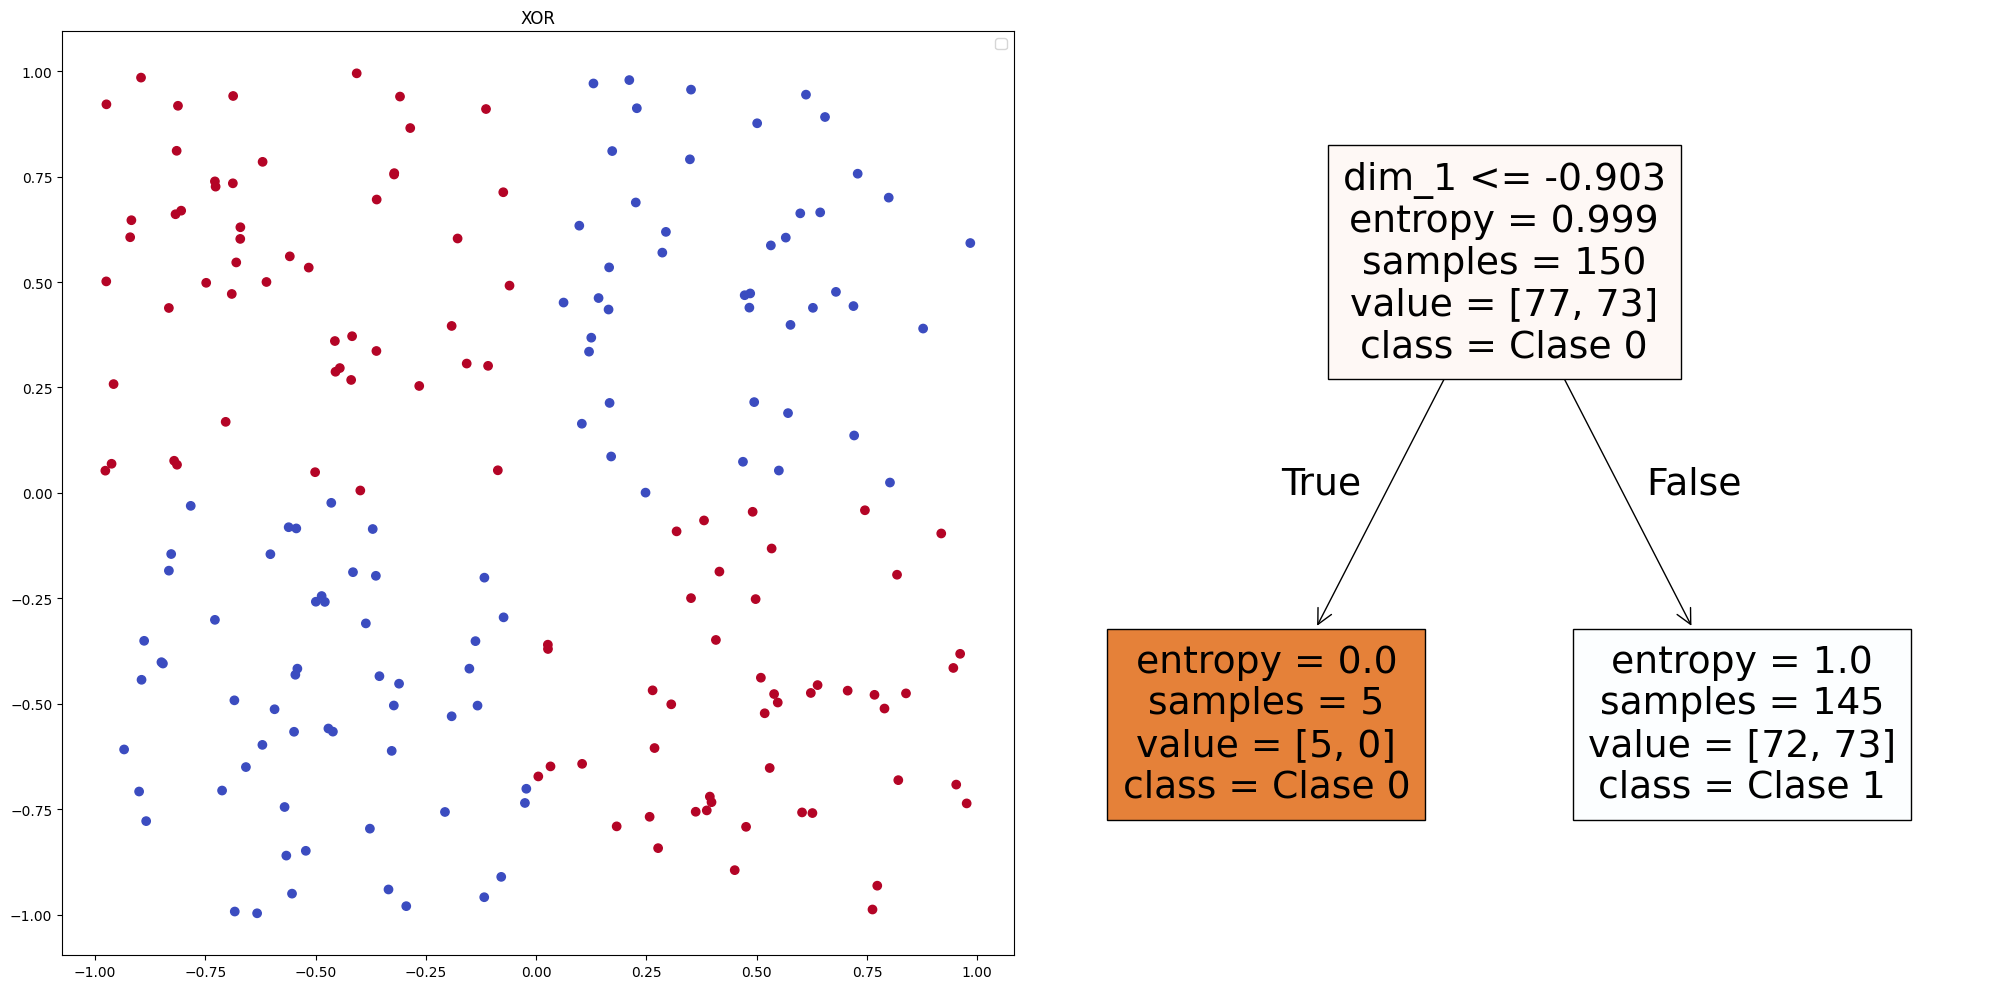

In [158]:
csv = pd.read_csv('xor.csv', names=['dim_0', 'dim_1', 'class'])
X = csv.drop(columns=['class'])
y = csv['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.03, random_state=0, min_samples_leaf=5)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(X['dim_0'], X['dim_1'], c=y, cmap='coolwarm')
axs[0].legend()
axs[0].set_title('XOR')

tree.plot_tree(clf, filled=True, feature_names=['dim_0', 'dim_1'], class_names=['Clase 0', 'Clase 1'], ax=axs[1])

plt.tight_layout() 
plt.show()



El arbol mas simple que clasifica correctamente a todos los puntos esta dado por:

- Si dim_0 <= 0:
   - Si dim_1 <= 0: Clase 0
   - Si dim_1 > 0: Clase 1
- Si dim_0 > 0:
   - Si dim_1 <= 0: Clase 1
   - Si dim_1 > 0: Clase 0

Se obtiene un arbol con un unico nodo, dado que la ganancia de entropia es menor al min_impurity_decrease. Esto sucede porque en la decision se obtienen 100 samples de cada clase, es decir una entropia de 1. Por ende el proceso termina al crearse un solo nodo.